In [1]:
import spacy

from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline

import numpy as np

In [2]:
train = fetch_20newsgroups(subset='train', shuffle=True, download_if_missing=True)
test = fetch_20newsgroups(subset='test', shuffle=True, download_if_missing=True)

In [4]:
train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [5]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
#Extracting Features from the text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train.data)
print(f'Shape of Term Frequency Matrix: {train_counts.shape}')

Shape of Term Frequency Matrix: (11314, 130107)


In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)

print(f'Shape of TFIDF Matrix: {train_tfidf.shape}')

Shape of TFIDF Matrix: (11314, 130107)


In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_tfidf, train.target)

In [11]:
#Lets build a pipeline for the above code
text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_nb_clf = text_nb_clf.fit(train.data, train.target)

In [14]:
predicted = text_nb_clf.predict(test.data)
naivebayes_accuracy = np.mean(predicted==test.target) * 100

In [15]:
print(f'Test Accuracy is {naivebayes_accuracy} %')

Test Accuracy is 77.38980350504514 %


In [19]:
from sklearn.linear_model import LogisticRegression as LR
import time
%time
Text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clr', LR())])
Text_lr_clf = Text_lr_clf.fit(train.data, train.target)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
lr_predicted = Text_lr_clf.predict(test.data)
lr_clf_accuracy = np.mean(lr_predicted == test.target) * 100
print(f'Test Accuracy is {lr_clf_accuracy}')

Test Accuracy is 82.79341476367499


In [22]:
from sklearn.metrics import confusion_matrix
#cf = confusion_matrix(y_true==test.target, y_pred==lr_predicted)

In [24]:
cf = confusion_matrix(y_true=test.target, y_pred=lr_predicted)

In [29]:
import json
print(json.dumps(cf.tolist(), indent=2))

[
  [
    236,
    2,
    0,
    0,
    1,
    1,
    3,
    0,
    3,
    3,
    1,
    1,
    2,
    9,
    2,
    35,
    3,
    4,
    1,
    12
  ],
  [
    2,
    304,
    13,
    8,
    8,
    19,
    7,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    5,
    2,
    1,
    1,
    1,
    1
  ],
  [
    1,
    21,
    294,
    31,
    12,
    10,
    2,
    2,
    1,
    5,
    0,
    1,
    1,
    2,
    4,
    2,
    0,
    0,
    4,
    1
  ],
  [
    0,
    12,
    24,
    283,
    22,
    2,
    13,
    3,
    1,
    1,
    1,
    1,
    24,
    0,
    4,
    0,
    0,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    21,
    319,
    1,
    11,
    1,
    1,
    5,
    1,
    0,
    10,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    41,
    38,
    5,
    4,
    292,
    3,
    0,
    1,
    1,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

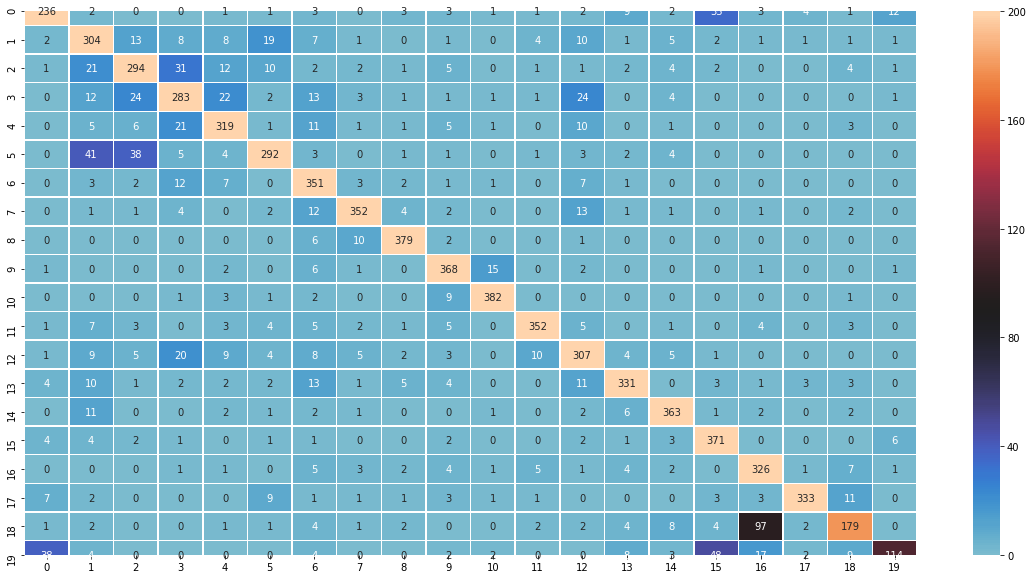

In [37]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d", linewidths=.5, center=90, vmax=200)

In [39]:
#Removing Stopwords
nlp = spacy.load('en')

In [40]:
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [42]:
print(STOP_WORDS)

{'due', 'both', 'rather', 'never', '‘m', 'them', 'me', 'the', 'nothing', 'mine', 'whereafter', 'used', 'very', 'each', 'for', 'under', 'about', 'thru', 'whence', 'empty', 'wherein', 'becomes', 'indeed', 'also', 'namely', 'no', 'still', 'formerly', 'whenever', 'regarding', 'being', 'amount', 'during', 'has', 'already', 'top', 'do', 'three', 'ourselves', 'towards', 'thus', 'within', 'must', 'therein', 'thereupon', 'thereafter', 'besides', 'enough', 'onto', 'and', "'d", 'become', 'next', 'him', 'as', 'whoever', 'fifteen', 'an', 'many', 'seem', 'various', '’d', 'toward', 'five', 'well', 'none', 'there', 'around', 'take', 'ca', 'anyway', 'where', 'from', 'because', 'you', 'until', 'using', 'became', 'sixty', 'herself', 'since', 'n‘t', 'side', '’ve', '‘d', 'above', 'so', 'moreover', 'a', 'beyond', 'himself', 'put', 'twelve', 'at', 'anywhere', 'ever', 'sometime', 'make', 'why', 'in', 'latterly', 'something', 'few', 'ten', 'name', 'becoming', 'get', 'by', "'re", 'otherwise', 'again', "'s", 'th

In [43]:
len(STOP_WORDS)

326

In [44]:
f'Their are {len(STOP_WORDS)} stopwords in spacy'

'Their are 326 stopwords in spacy'

In [45]:
#We can also add our own stopwords in this
STOP_WORDS.add("THis")

In [46]:
len(STOP_WORDS)

327

In [47]:
doc = nlp('I am Learning the most important ideas of the idea of machine learning')

In [48]:
print(doc)

I am Learning the most important ideas of the idea of machine learning


In [49]:
for i in doc:
    print(i)

I
am
Learning
the
most
important
ideas
of
the
idea
of
machine
learning


In [50]:
tokens = i

In [53]:
simplified_docs = [token for token in doc if not token.is_punct | token.is_stop]

In [54]:
simplified_docs

[Learning, important, ideas, idea, machine, learning]

In [57]:
for token in simplified_docs:
    print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tPart-of-Speech-Tag:{token.pos}')

Token:Learning	Lemmatized:learn	Part-of-Speech-Tag:100
Token:important	Lemmatized:important	Part-of-Speech-Tag:84
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:92
Token:idea	Lemmatized:idea	Part-of-Speech-Tag:92
Token:machine	Lemmatized:machine	Part-of-Speech-Tag:92
Token:learning	Lemmatized:learning	Part-of-Speech-Tag:92


In [58]:
#Integrating Back with our classifier pipeline
??CountVectorizer

In [59]:
from spacy.lang.en import English
tokenizer = English().Defaults.create_tokenizer(nlp)

In [60]:
def spacy_tokenizer(document):
    return [token.orth_ for token in tokenizer(document)]

In [61]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LR())])

CPU times: user 160 µs, sys: 7 µs, total: 167 µs
Wall time: 171 µs


In [62]:
text_lr_clf = text_lr_clf.fit(train.data, train.target)

/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
def cal_print_accuracy(text_lr_clf):
    predictions = text_lr_clf.predict(test.data)
    clf_accuracy = np.mean(predictions == test.target) * 100
    print(f'Test Accuracy is {clf_accuracy}')
    return clf_accuracy

cal_print_accuracy(text_lr_clf)

Test Accuracy is 82.79341476367499


82.79341476367499

In [65]:
%%time 
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf', LR())])

CPU times: user 148 µs, sys: 5 µs, total: 153 µs
Wall time: 155 µs


In [67]:
text_lr_clf = text_lr_clf.fit(train.data, train.target)

cal_print_accuracy(text_lr_clf)

/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy is 78.26606479022836


78.26606479022836